In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt


In [9]:
# uniform distribution
def uniform_pdf(x):
    return np.linspace(1,1,len(x))
def uniform_cdf(x):
    return np.array(x)
def uniform_reverse(nsamp):
    rs = np.random.rand(nsamp)
    return np.array(rs)

# linear distribution
def linear_pdf(x):
    x = np.array(x)
    # cuz integral of y=ax yield 1 when a=2
    return x*2
def linear_cdf(x):
    x = np.array(x)
    return x**2
def linear_reverse(nsamp):
    rs = np.random.rand(nsamp)
    return [np.sqrt(i) for i in rs]

# exponential distribution
def exp_pdf(x, a = 1):
    x = np.array(x)
    return a*np.exp(-a * x)
def exp_cdf(x, a = 1):
    x = np.array(x)
    return 1 - np.exp(-a * x)
def exp_reverse(nsamp,  a=1):
    rs = np.random.rand(nsamp)
    return [-(1/a) * np.log(1 - i) for i in rs]
    
# gaussian distribution
def gaussian_pdf(x, mu = 0, sigma = 1):
    x = np.array(x)
    return [1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(i-mu)**2 / (2 * sigma**2)) for i in x] 
    
def gaussian_cdf(x, mu = 0, sigma = 1):
    arr = gaussian_pdf(x, mu, sigma)
    return [i/np.sum(arr) for i in np.cumsum(arr)]

# use uniform generstor to generate theta; exp genertor to generator mu
def gaussian_generator(nsamp):
    thetas = [i*2*np.pi for i in uniform_reverse(nsamp)]
    mus = [i for i in exp_reverse(nsamp)]    # r**2<2 cancelled with 2 below ; sigma**2 in mu cancel with that in r
    x = [np.cos(i)*np.sqrt(2 * j) for i,j in zip(thetas, mus)]
    y = [np.sin(i)*np.sqrt(2 * j) for i,j in zip(thetas, mus)]
    # one can check y use above arr
    return x


    

In [3]:
def plotter(nsamp = 1000, binNumber = 20, cumBinNumber = 100, fun = 'exp', plotted = True):
    if fun == 'exp':
        reverse = exp_reverse
        pdf = exp_pdf
        cdf = exp_cdf
    elif fun == 'linear' or fun == 'lin':
        reverse = linear_reverse
        pdf = linear_pdf
        cdf = linear_cdf
    elif fun == 'uniform':
        reverse = uniform_reverse
        pdf = uniform_pdf
        cdf = uniform_cdf
    elif fun == 'gaussian':
        reverse = gaussian_generator
        pdf = gaussian_pdf
        cdf = gaussian_cdf
    else:
        return 'Wrong function name'

    values = reverse(nsamp)
    #Obtain histogram with number of bins equal to binNumber--this is to compare to the PDF
    histValues1, binEdges1 = np.histogram(values, binNumber)
    #Obtain histogram with number of bins equal to cumbinNumber--this is to compare to the CDF
    histValues2, binEdges2 = np.histogram(values, cumBinNumber)
    cumHistValues = np.cumsum(histValues2)/nsamp
    #Need to initialize new arrays binCenterHist and binCenterCumHist
    binCenterHist = np.zeros(len(binEdges1)-1)
    binCenterCumHist = np.zeros(len(binEdges2)-1)

    for i in range(len(binEdges1) - 1):
        binCenterHist[i] = 0.5 * (binEdges1[i] + binEdges1[i + 1])
    for i in range(len(binEdges2) - 1):
        binCenterCumHist[i] = 0.5 * (binEdges2[i] + binEdges2[i + 1])
    #find bin widths
    #diff commmand simply takes difference between (i+1)th and ith array elements
    binWidthHist=np.diff(binEdges1)
    #The quantity norm is a normalization constant needed to compare the theoretical PDF
    #to the histogram of simulated values
    norm = nsamp*binWidthHist[0]
    if plotted == True:
        f1 = plt.figure(figsize=(6,12))
        
        plt.subplot(3, 1, 1)
        plt.plot(range(nsamp), values, '.', label='sample data')
        plt.xlabel('trials', fontsize=14)
        plt.ylabel('values', fontsize=14)
        plt.legend(fontsize=14)
        plt.title("distribution of sample by %s generator"%(fun), fontsize=16)

        plt.subplot(3, 1, 2)
        #plt.plot(binCenterHist, histValues1, '.')
        # errorbars : sqrt (counts)
        error_y = [np.sqrt(count) for count in histValues1]
        error_x =  [0] * np.size(binCenterHist)
        plt.errorbar(binCenterHist, histValues1, error_y, error_x, '.', ecolor="black", mec="black", capsize=2, label="sample data")
        plt.plot(binCenterHist, [norm*i  for i in pdf(binCenterHist)], 'red', label="curve fit")
        plt.xlabel('values', fontsize=14)
        plt.ylabel('counts', fontsize=14)
        plt.legend(fontsize=14)
        plt.title("distribution with %s curve fit"%(fun), fontsize=16)

        plt.subplot(3, 1, 3)
        plt.plot(binCenterCumHist, cumHistValues, '.', label="sample data")
        '''error_y = [np.sqrt(count) for count in cumHistValues]
        error_x =  [0] * np.size(binCenterCumHist)
        plt.errorbar(binCenterCumHist, cumHistValues, error_y, error_x, '.', ecolor="black", mec="black", capsize=2, label="sample data")'''
        plt.plot(binCenterCumHist, cdf(binCenterCumHist), 'red', label="curve fit")
        plt.xlabel('value', fontsize=14)
        plt.ylabel('cumulative counts', fontsize=14)
        plt.legend(fontsize=14)
        plt.title("cumulative distribution for %s generator"%(fun), fontsize=16)


        plt.tight_layout()
        plt.savefig(fun+"_7_1.pdf", bbox_inches='tight')

    return np.mean(values), np.std(values)

(0.9751490048633669, 0.9298582711053431)

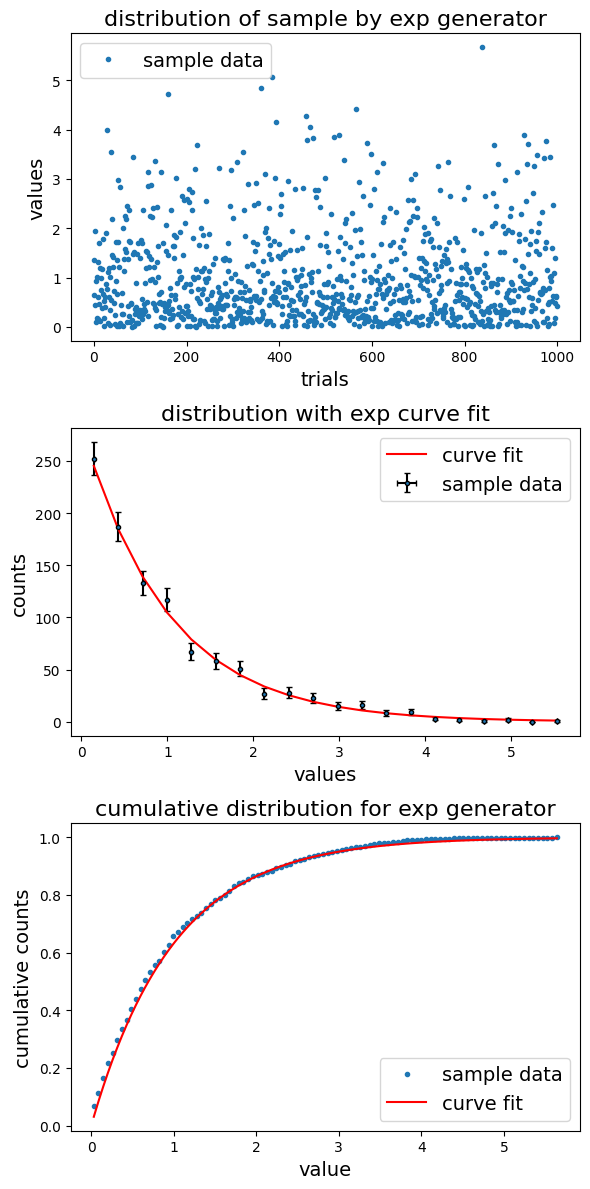

In [12]:
plotter(fun='exp')

(0.6677571960057072, 0.23274025279837704)

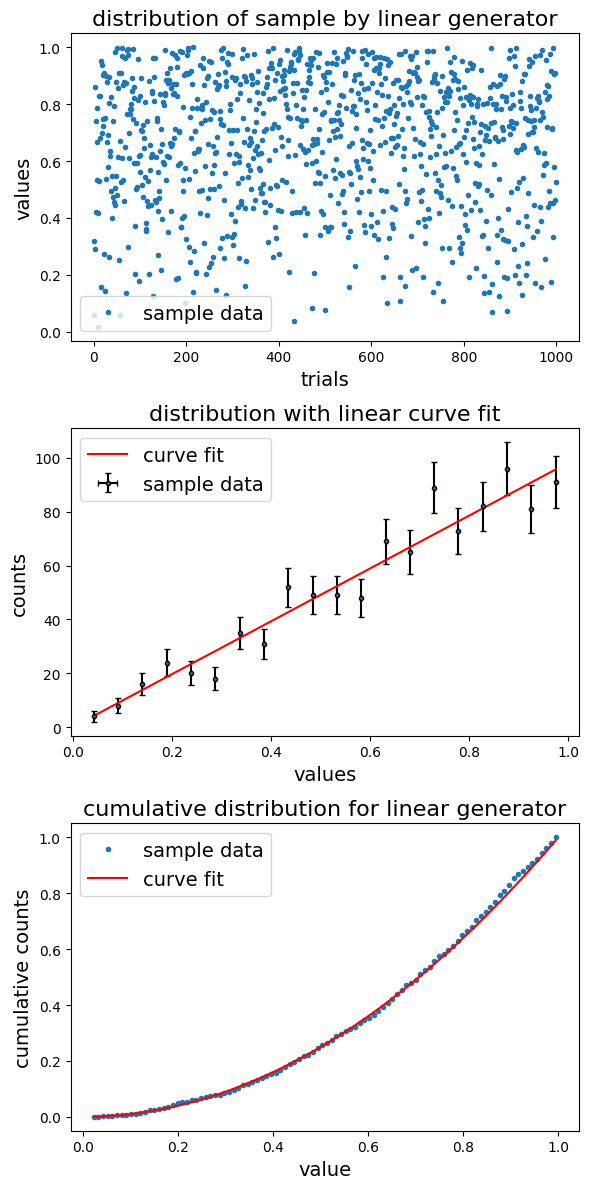

In [113]:
plotter(fun='linear')

(0.4953147653466786, 0.29067430021922086)

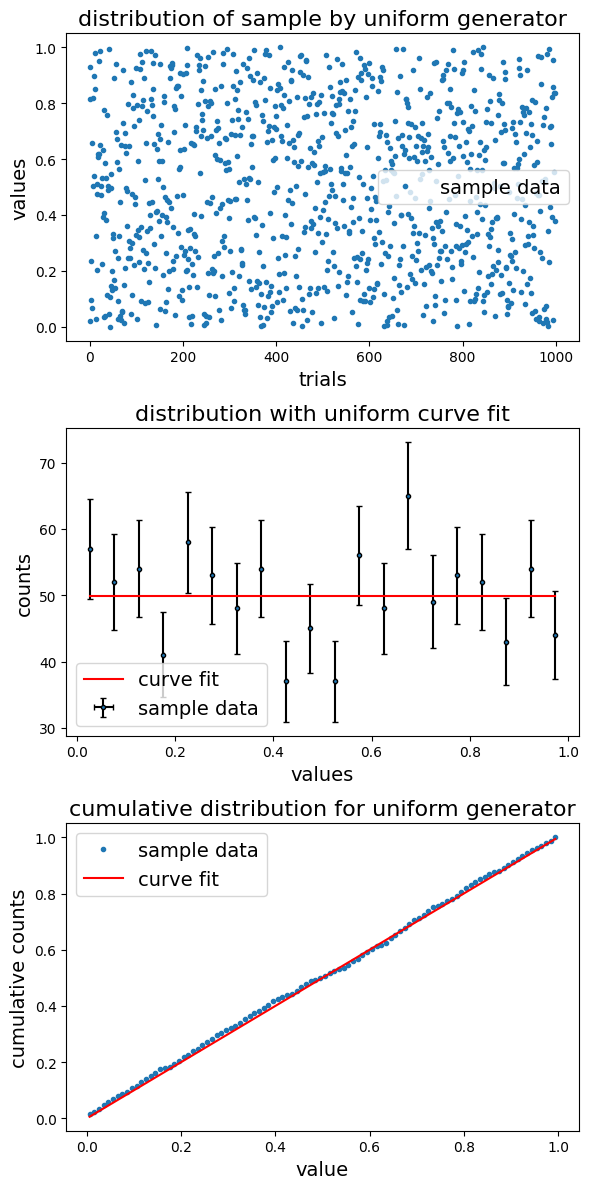

In [114]:
plotter(fun='uniform')

(0.012636979628954397, 0.9971368475558742)

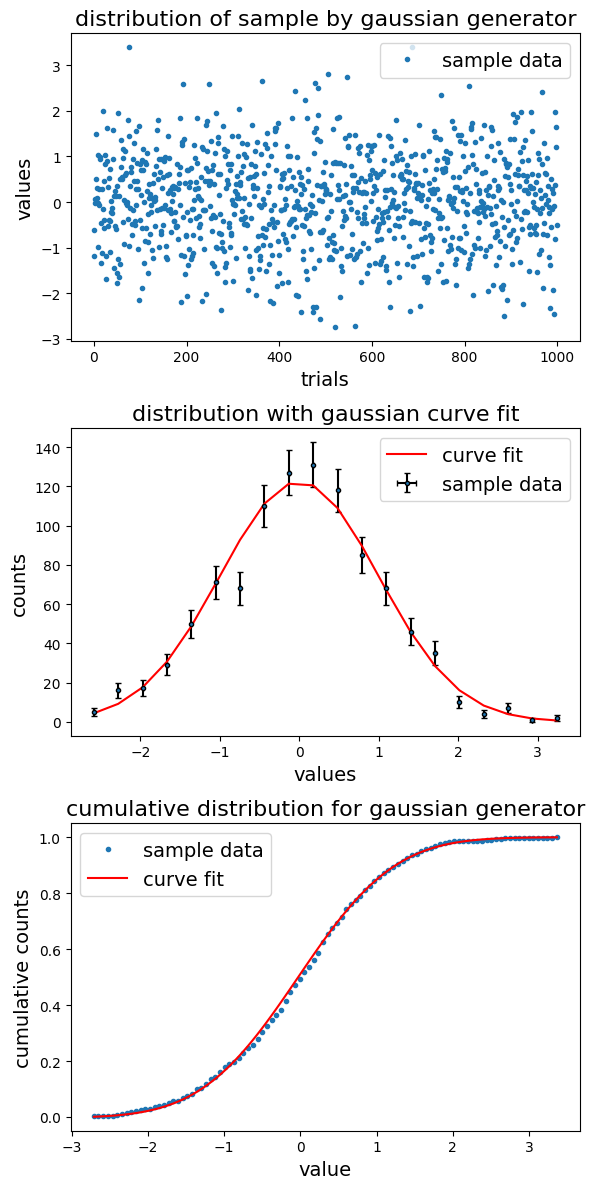

In [115]:
plotter(fun='gaussian')

0.4992851662442208 0.028254422143503315


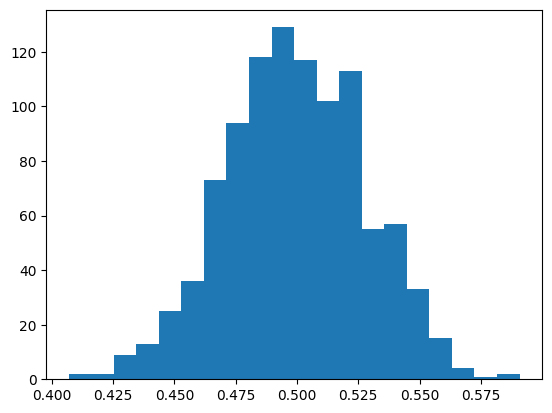

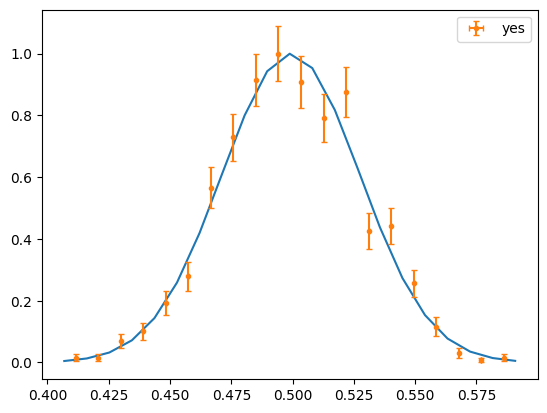

In [116]:
#run 1000 times of uniform function, n = 100
run = 1000
sample_size = 100
binnum = 20
mean = np.zeros(run)
for i in range(run):
  mean[i] = plotter(fun="uniform", nsamp = sample_size, plotted = False)[0]

mean_of_mean = np.mean(mean)
std_of_mean = np.std(mean)
print(mean_of_mean, std_of_mean)

count, bins, _ = plt.hist(mean, binnum, density = 0, histtype="bar")
plt.show()
errors = [i**0.5 for i in count]

bincenter = np.zeros(binnum)
for i in range(binnum):
  bincenter[i] = 0.5*(bins[i] + bins[i+1])



#print(count)
maxentry = max(count)
count = [i/maxentry for i in count]
errors = [i/maxentry for i in errors]

#plt.plot(bincenter, count, ".")
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
plt.plot(bins, gaussian(bins, mean_of_mean, std_of_mean))
plt.errorbar(bincenter, count, errors, [0]*binnum, '.', capsize = 2, label = "yes")
plt.legend()
plt.show()

bins_100 = bins
mean_of_mean_100 = mean_of_mean
std_of_mean_100 = std_of_mean
maxvalue_100 = maxentry

In [173]:
def multiple_runner(run = 1000, nsamp = 100, binnum = 20, fun = 'uniform'):
    if fun == 'exp':
        reverse = exp_reverse
    elif fun == 'linear' or fun == 'lin':
        reverse = linear_reverse
    elif fun == 'uniform':
        reverse = uniform_reverse
    elif fun == 'gaussian':
        reverse = gaussian_generator
    else:
        return 'Wrong function name'

    mean = []
    for i in range(run):
        mean += [np.mean(reverse(nsamp))]

    mean_of_mean = np.mean(mean)
    std_of_mean = np.std(mean)
    print('mean and std of mean values, error of error', mean_of_mean, std_of_mean, std_of_mean/np.sqrt(2*run-2))
    count, bins, _ = plt.hist(mean, binnum, density = 0, histtype="bar", label='average value of sample')

    # errorbars : difference btwn means from runs
    # same for all bins?
    # TODO: can i just use std_of_mean?
    binCenterHist = np.zeros(len(bins)-1)
    for i in range(len(bins) - 1):
        binCenterHist[i] = 0.5 * (bins[i] + bins[i + 1])

    error_y = [np.sqrt(c) for c in count]
    error_x =  [0] * np.size(binCenterHist)
    plt.errorbar(binCenterHist, count, error_y, error_x, '.', capsize=2, label="sample data")

    
    tmp = gaussian_pdf(bins, mu=mean_of_mean, sigma=std_of_mean)
    plt.plot(bins, [i/ np.sum(tmp) * 1000 for i in tmp], label='gaussian fit of sample')
    plt.legend(loc='upper left',fontsize=12)
    plt.title("distribution of %d mean of from %d %s sample"%(run, nsamp, fun), fontsize=16)
    plt.xlabel('mean', fontsize=14)
    plt.ylabel('counts',fontsize=14)

    return bins, mean_of_mean, std_of_mean
    



In [174]:
def compare_nsamp(run=1000, nsamp=[100,500,1000], binnum=20, fun='exp'):
    bins, gaussian_fits = [], []
    nfig = len(nsamp)
    f1 = plt.figure(figsize=(6,5*nfig))

    for i in range(nfig):
        plt.subplot(nfig+1, 1, i+1)
        bin, mean, std = multiple_runner(run=run, nsamp=nsamp[i], binnum=binnum, fun=fun)
        bins += [bin]
        gaussian_fits += [gaussian_pdf(bin, mu=mean, sigma=std)]
    plt.tight_layout()
    f1.savefig('individual_'+fun+"_7_3.pdf", bbox_inches='tight')
    plt.show()
    for i in range(nfig): 
        plt.plot(bins[i], gaussian_fits[i],label=str(nsamp[i]) + ' samples')
        
    plt.xlabel("value of the mean",fontsize=14)
    plt.ylabel("count",fontsize=14)
    plt.title("distribution of %d means for %s distribution"%(run, fun), fontsize=16)
    plt.legend(loc='upper right',fontsize=14)
    plt.savefig('compare_'+fun+"_7_3.pdf", bbox_inches='tight')
    plt.show()
    

mean and std of mean values, error of error 1.0031426165655302 0.10051604535731623 0.0022487317495910103
mean and std of mean values, error of error 1.0001204437895086 0.0445370945479184 0.0009963780229158314
mean and std of mean values, error of error 0.9987999432495647 0.031438305839850245 0.0007033336443361971


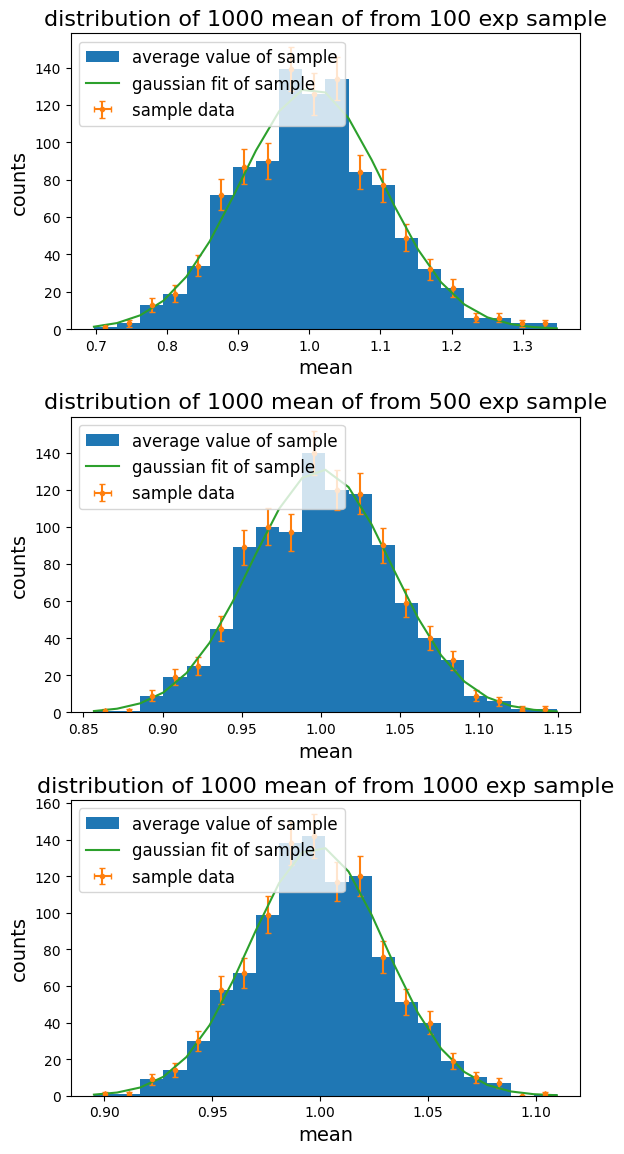

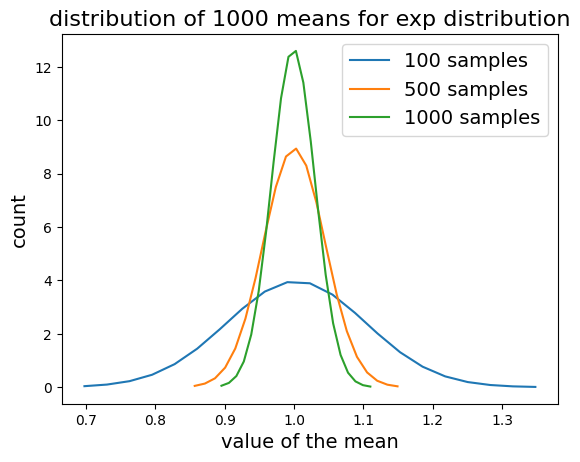

In [175]:
# just for test
compare_nsamp()

mean and std of mean values, error of error 0.4997894871366742 0.028866930880231623 0.0006458071818570719
mean and std of mean values, error of error 0.4996144358965726 0.012837716182509307 0.00028720369836700635
mean and std of mean values, error of error 0.5000294996047593 0.008819420090805401 0.0001973069065806755


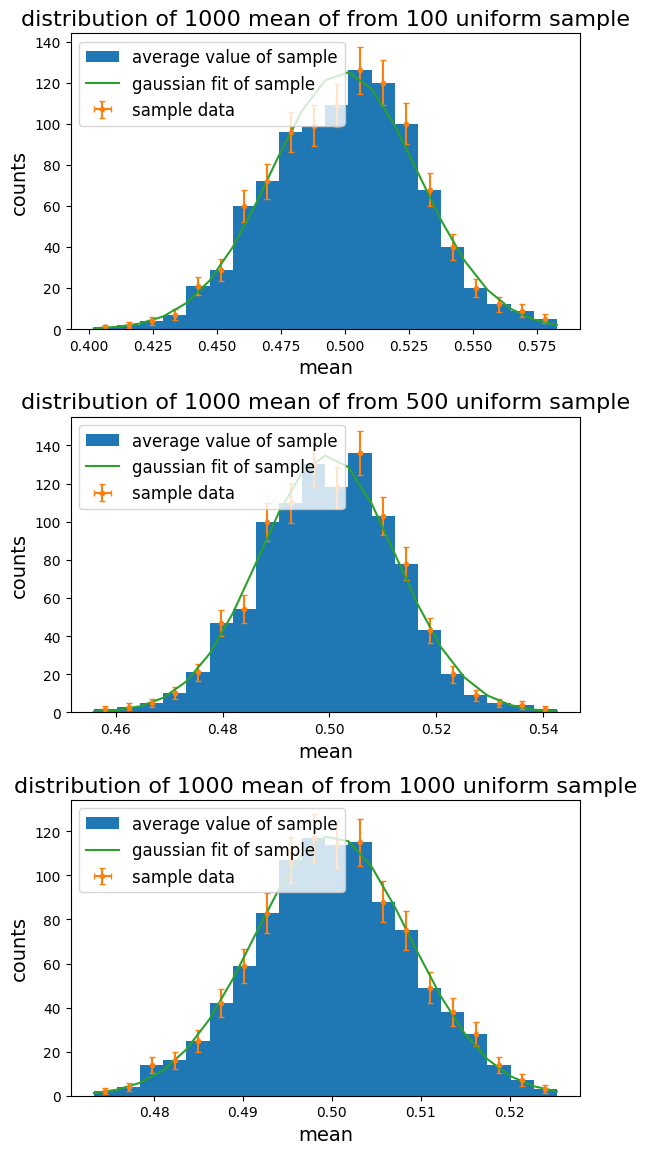

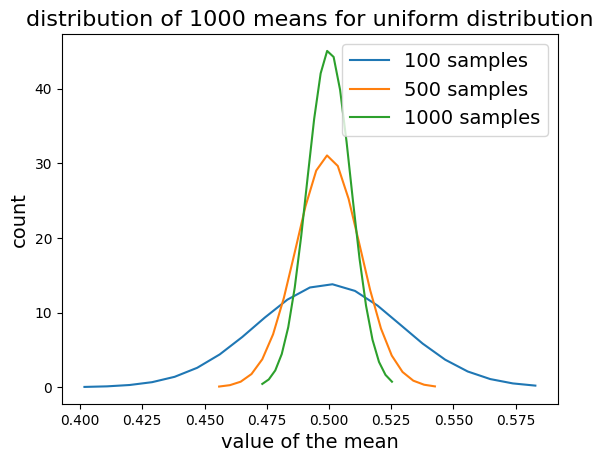

In [176]:
compare_nsamp(fun='uniform')

mean and std of mean values, error of error 0.6665125060375158 0.023504292270721365 0.0005258349360338278
mean and std of mean values, error of error 0.6663885957852247 0.010826723572125418 0.00024221403611867954
mean and std of mean values, error of error 0.6666105745004638 0.007245741492178821 0.00016210077589971054


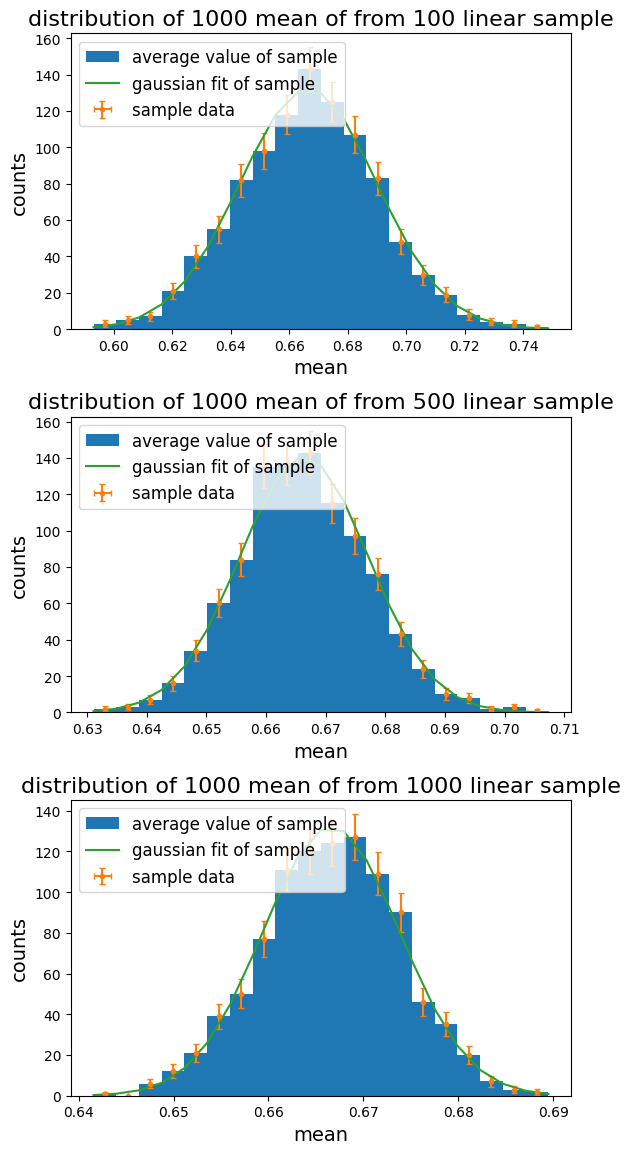

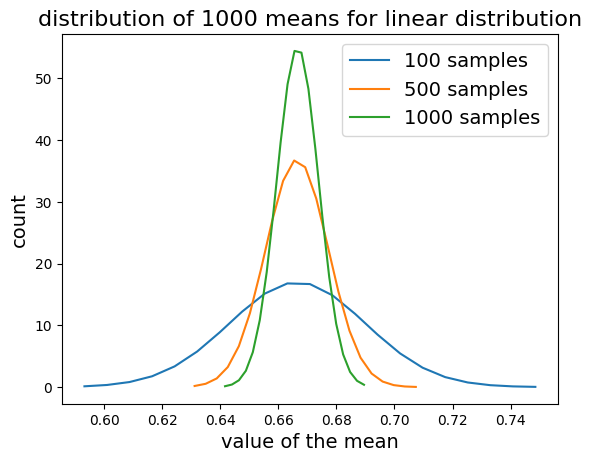

In [177]:
compare_nsamp(fun='linear')

mean and std of mean values, error of error -0.0028346196953070732 0.09686442750132977 0.002167038235078578
mean and std of mean values, error of error -0.0009897626536096175 0.04648187289396192 0.001039886348349039
mean and std of mean values, error of error 0.001298239237768292 0.032743179589946644 0.0007325261082917648


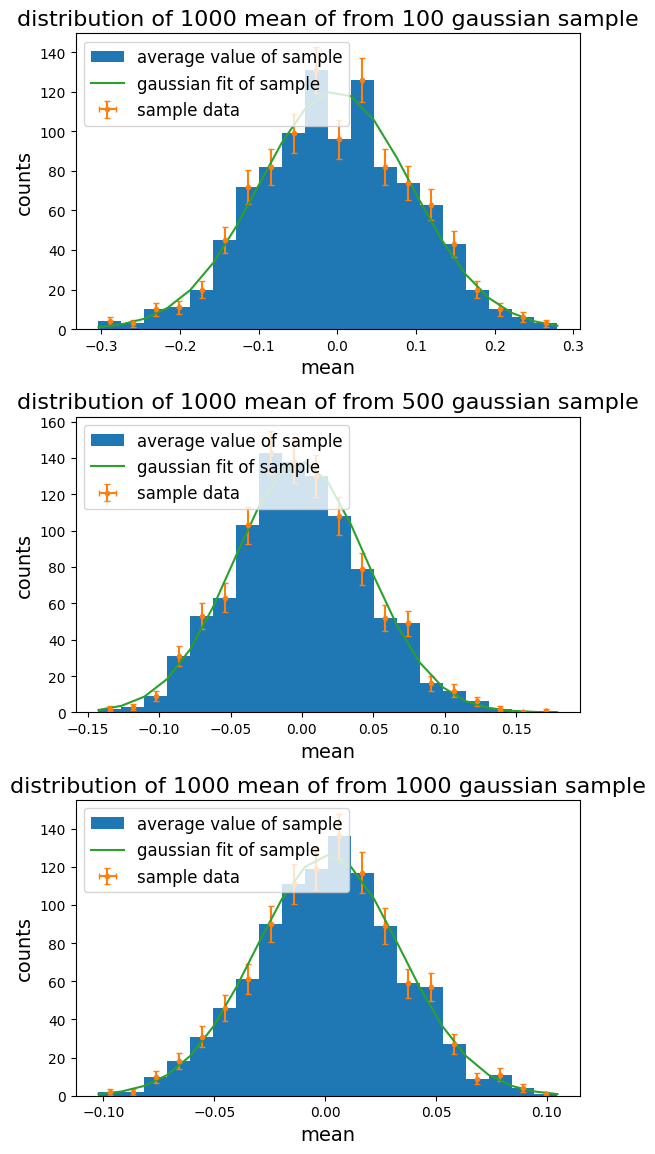

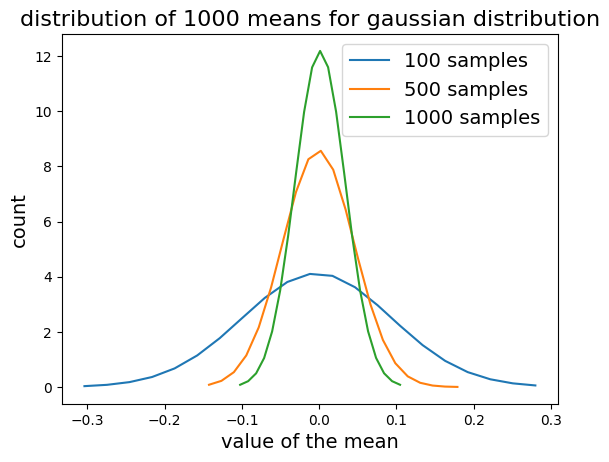

In [178]:
compare_nsamp(fun='gaussian')